In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
este=pd.read_csv('Gain 15 MHz phi=0.csv')

In [3]:
delf=1
rf=range(11,20,delf)
ar=[]
for fr in rf:
    fname='Gain %i MHz phi=0.csv'%fr
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1,sep=';')
    dum=dum[np.isfinite(dum.gain)]
    ar+=[list(dum.gain)]
ar=np.array(ar)

In [4]:
ar_1=pow(10,ar/10)
ar_1

array([[0.03090236, 0.0306787 , 0.0300618 , ..., 0.03014902, 0.03072303,
        0.03090236],
       [0.02950005, 0.02925725, 0.02860313, ..., 0.02872427, 0.0293192 ,
        0.02950005],
       [0.02735259, 0.02712712, 0.02647267, ..., 0.02648565, 0.02713457,
        0.02735259],
       ...,
       [0.00942439, 0.00934922, 0.00920378, ..., 0.00935638, 0.009423  ,
        0.00942439],
       [0.00844458, 0.00833574, 0.00822912, ..., 0.00865689, 0.00854893,
        0.00844458],
       [0.00860932, 0.00845402, 0.00839205, ..., 0.00918464, 0.00885159,
        0.00860932]])

In [5]:
rt=list(dum.theta)
rt=np.array(rt)
rf=np.array(rf)

In [6]:
rf

array([11, 12, 13, 14, 15, 16, 17, 18, 19])

In [7]:
rt

array([-180, -179, -178, -177, -176, -175, -174, -173, -172, -171, -170,
       -169, -168, -167, -166, -165, -164, -163, -162, -161, -160, -159,
       -158, -157, -156, -155, -154, -153, -152, -151, -150, -149, -148,
       -147, -146, -145, -144, -143, -142, -141, -140, -139, -138, -137,
       -136, -135, -134, -133, -132, -131, -130, -129, -128, -127, -126,
       -125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115,
       -114, -113, -112, -111, -110, -109, -108, -107, -106, -105, -104,
       -103, -102, -101, -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,
        -92,  -91,  -90,  -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,
        -81,  -80,  -79,  -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,
        -70,  -69,  -68,  -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,
        -59,  -58,  -57,  -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,
        -48,  -47,  -46,  -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,
        -37,  -36,  -35,  -34,  -33,  -32,  -31,  -

Text(0.5, 0, '$\\theta$ ($^\\circ$)')

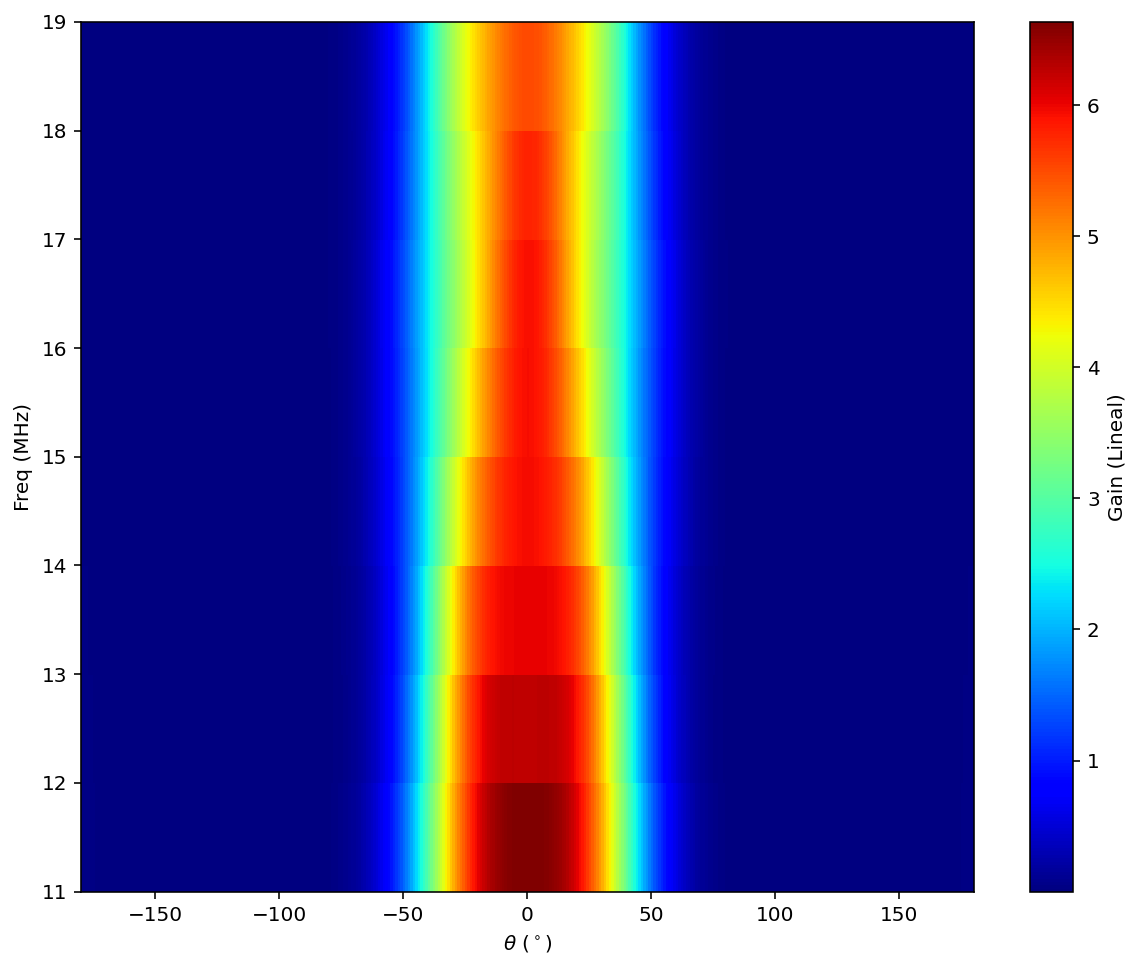

In [8]:
#calculo de la ganancia de la antena vs la frecuencia y el ángulo de elevación (forma normal)
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,ar_1,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipologainphi0')

In [9]:
ar_2=np.array(ar_1[-5:5])

Text(0.5, 0, '$\\theta$ ($^\\circ$)')

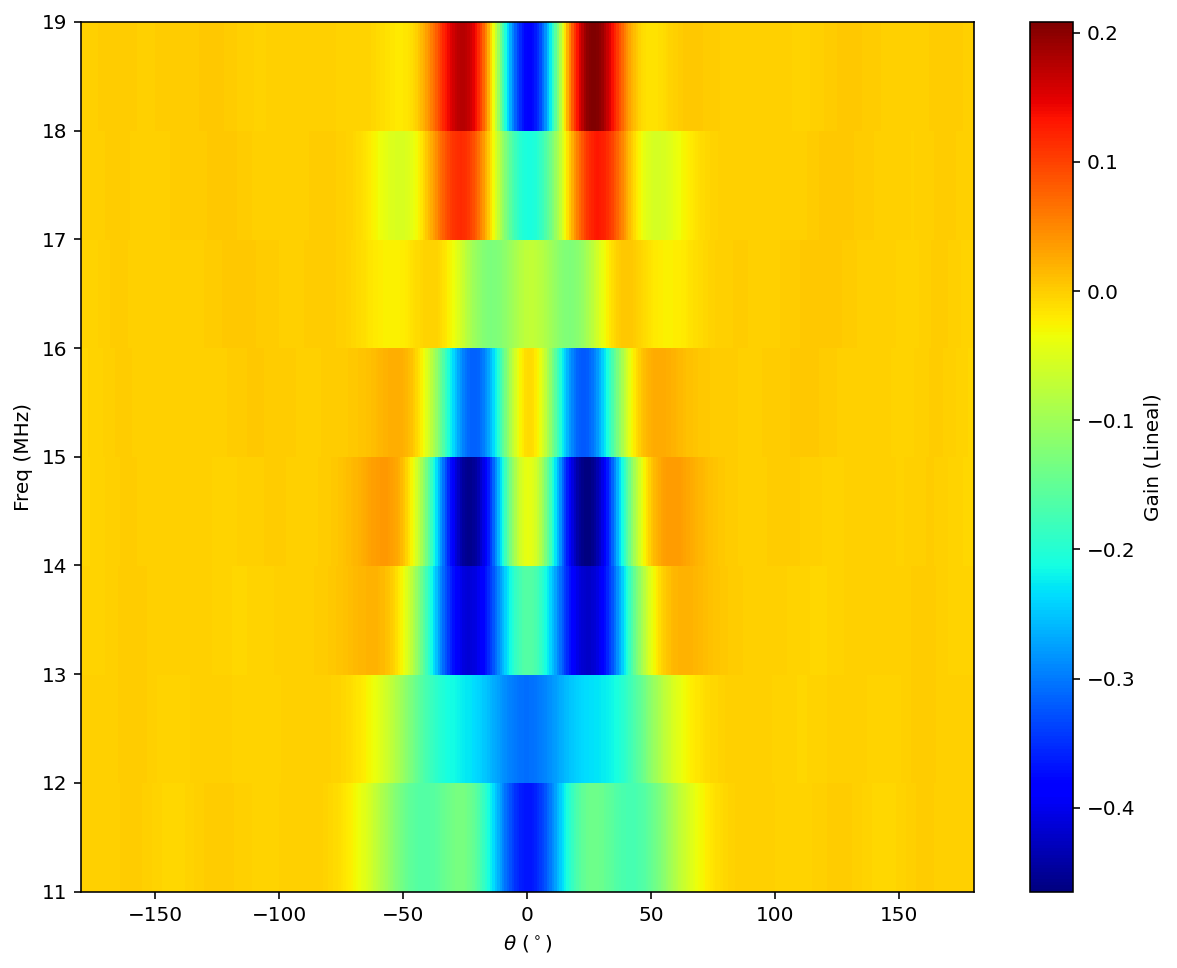

In [10]:
#derivada de la ganancia vs la frecuencia y el ángulo de elevación (forma normal)
deriv=np.gradient(ar_1,delf)
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,deriv[0],cmap='jet')
plt.xlim=(0,90)
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Derivadagainphi0')

Text(0.5, 0, '$\\theta$ ($^\\circ$)')

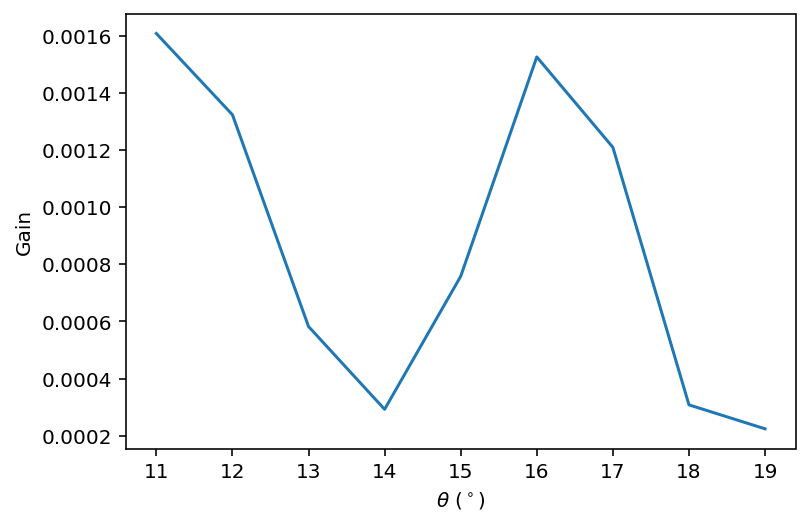

In [11]:
#corte en un ángulo para ver el comportamiento de la ganancia 
te=86
ga=ar_1[:,te]
plt.plot(rf,ga)
plt.ylabel('Gain')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('corteDipologainphi0')

In [12]:
# primera forma de interpolar 
spl = interpolate.UnivariateSpline(rf, ga)
spl.set_smoothing_factor(0.2)

In [13]:
#para graficar los datos interpolados
delspl=0.1
rfspl=np.arange(11,20,delspl)

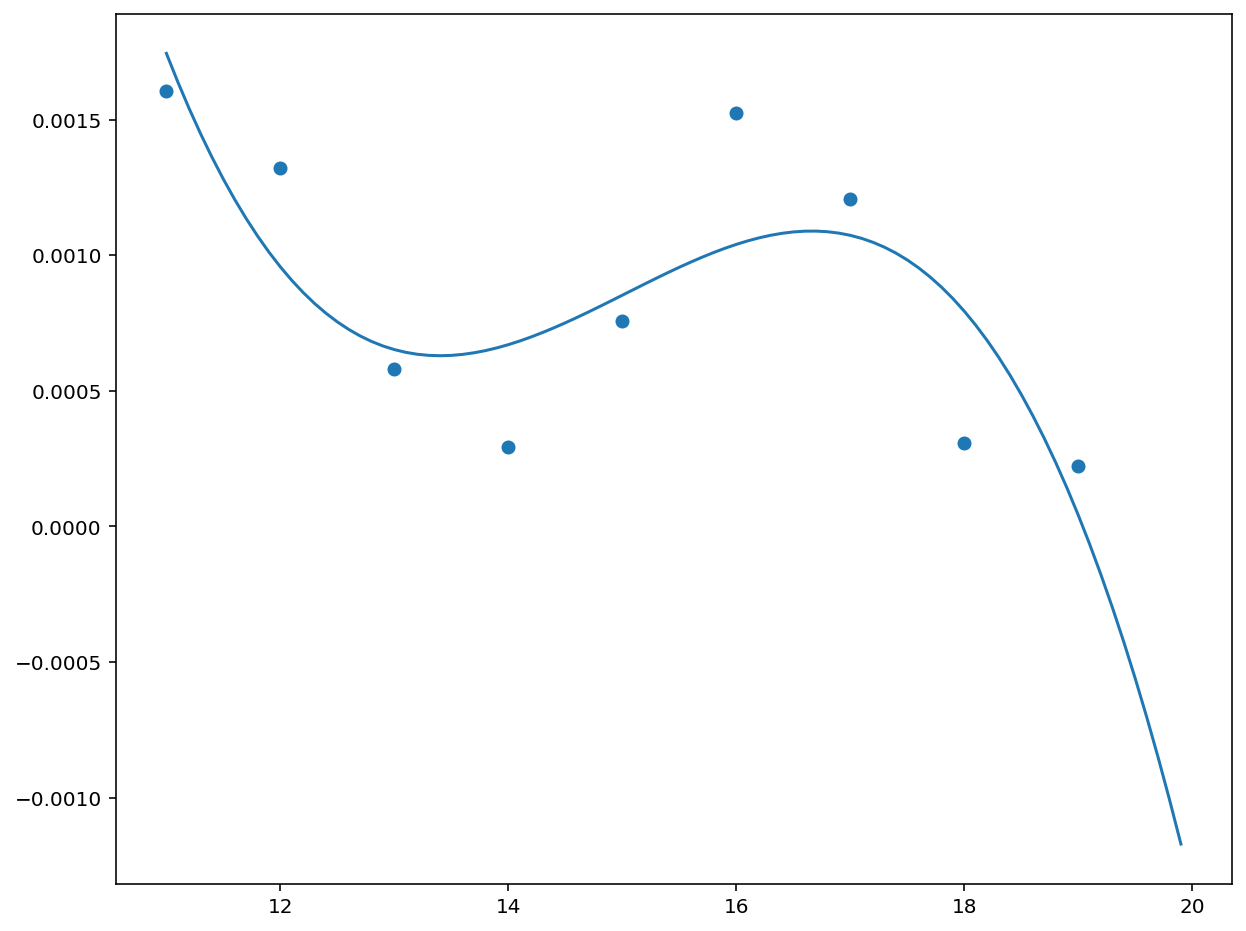

In [14]:
#esta gráfica según lo establecido antes 
plt.figure(figsize=(10,8))
plt.scatter(rf,ga)
plt.plot(rfspl,spl(rfspl))
#plt.savefig('Dipolointerpoladogainphi0')
#plt.xlim(70,90)

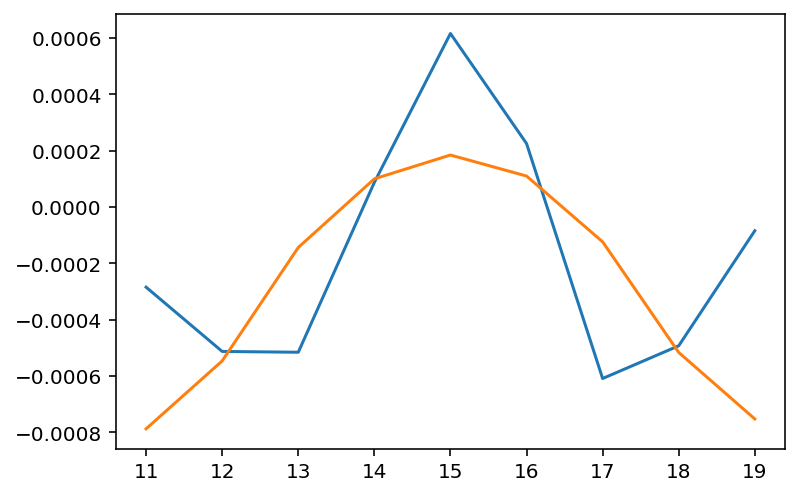

In [15]:
deriv=np.gradient(ar_1,delf)
derivint=np.gradient(spl(rf),delf)
plt.plot(rf,deriv[0][:,te])
plt.plot(rf,derivint)
#plt.savefig('Dipoloderivadainterpoladogainphi0')

In [16]:
arspl=[]
for t in range(ar_1.shape[1]):
    ga=ar_1[:,t]
    spl = interpolate.UnivariateSpline(rf, ga)
    spl.set_smoothing_factor(0.2)
    arspl+=[spl(rfspl)]
arspl=np.array(arspl)

Text(0.5, 0, '$\\theta$ ($^\\circ$)')

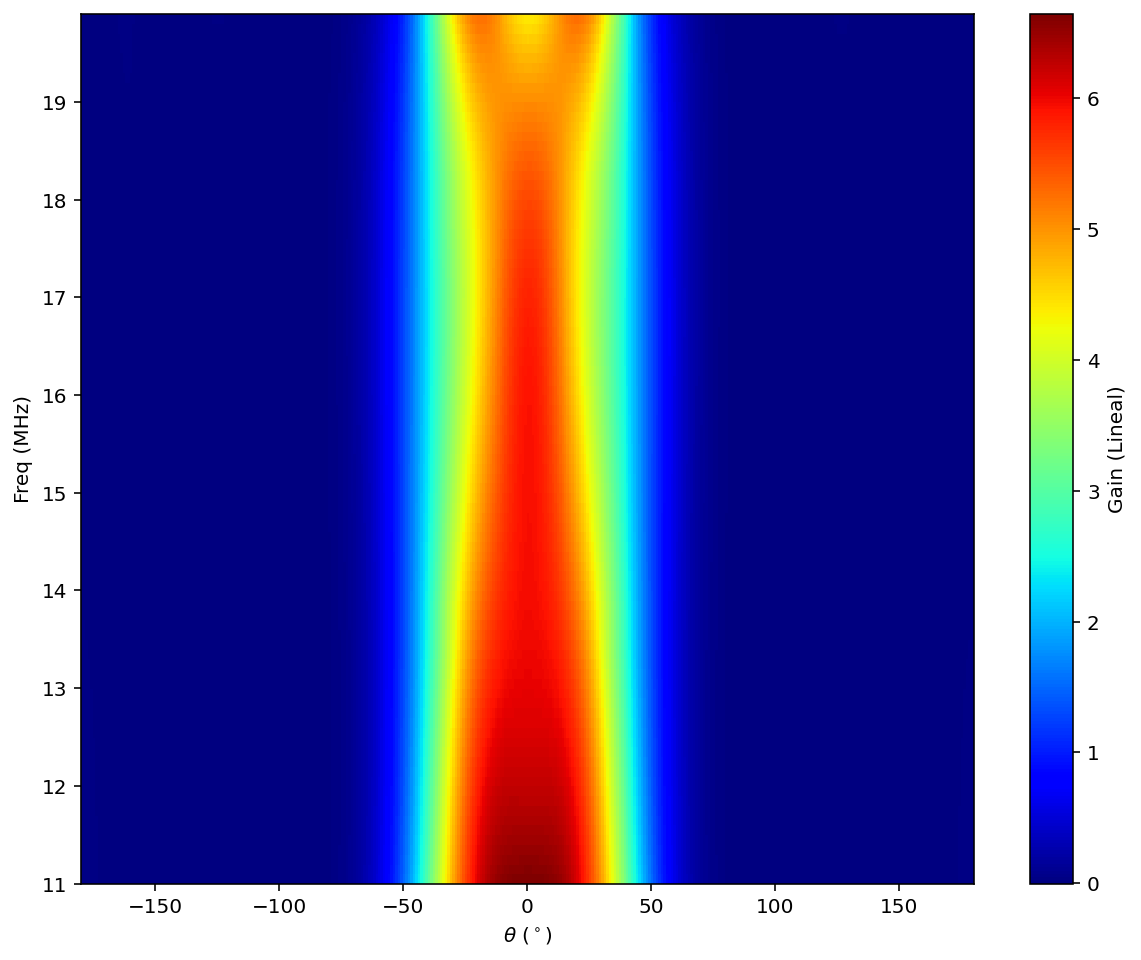

In [17]:
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rfspl)
plt.pcolor(x,y,arspl.T,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipoloderivadainterpoladogainphi0')

In [18]:
bvsp=interpolate.RectBivariateSpline(rf,rt,ar_1,s=2)
dx2, dy2 = 0.1, 0.1
x2 = np.arange(0, 90, dx2)
#x2 = np.arange(0, rt.max(), dx2)
#y2 = np.arange(rf.min(), rf.max(), dy2)
#X2, Y2 = np.meshgrid(x2,y2)
#Z2 = bvsp(y2, x2)

In [19]:
y2 = np.arange(11, 19, dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = bvsp(y2, x2)

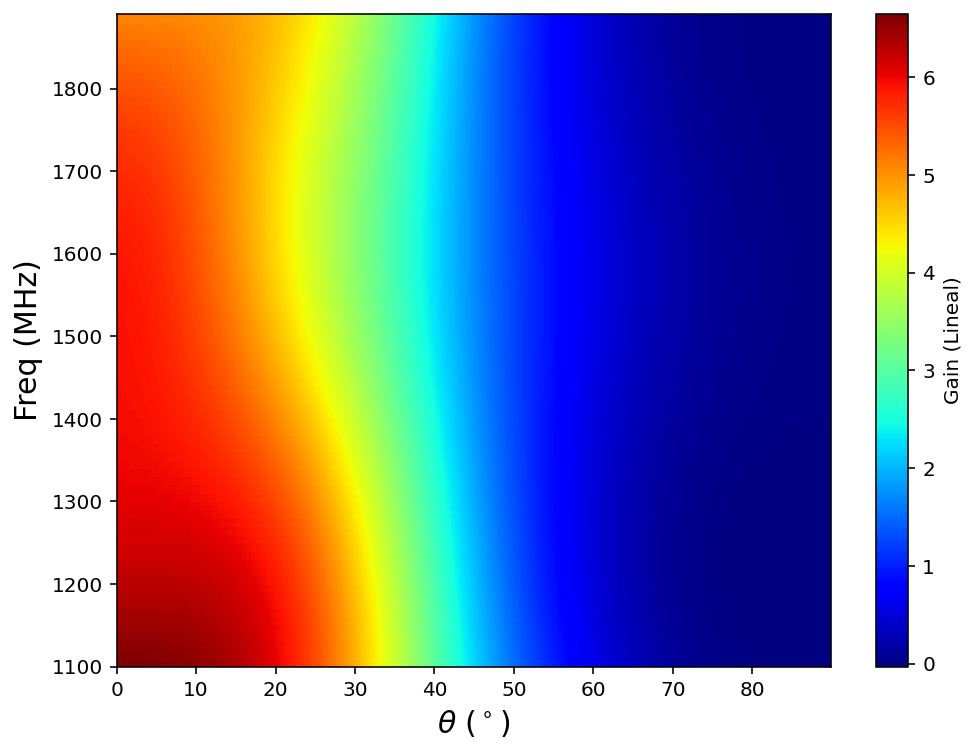

In [20]:
plt.figure(figsize=(8,6))
plt.pcolor(X2,Y2*100,Z2,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
#plt.tick_params(axis='both', which='major', labelsize=15)
#plt.ylim(40,120)
#plt.xlim(-89,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.savefig('Ganancia_BLADE_Phi0')


In [21]:
gmax=Z2.max() #cálculo la ganancia máxima
derivbspl=np.gradient(Z2,dx2)
#val=max(derivbspl[0].max(),-derivbspl[0].min())
print (gmax)

6.643556807432081


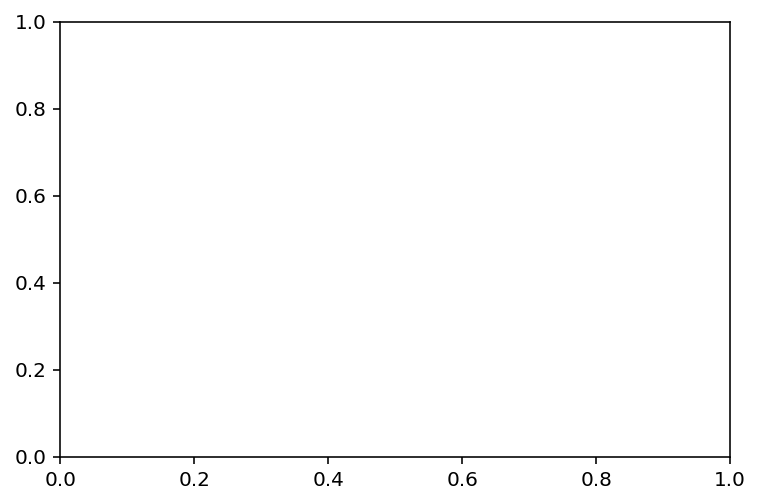

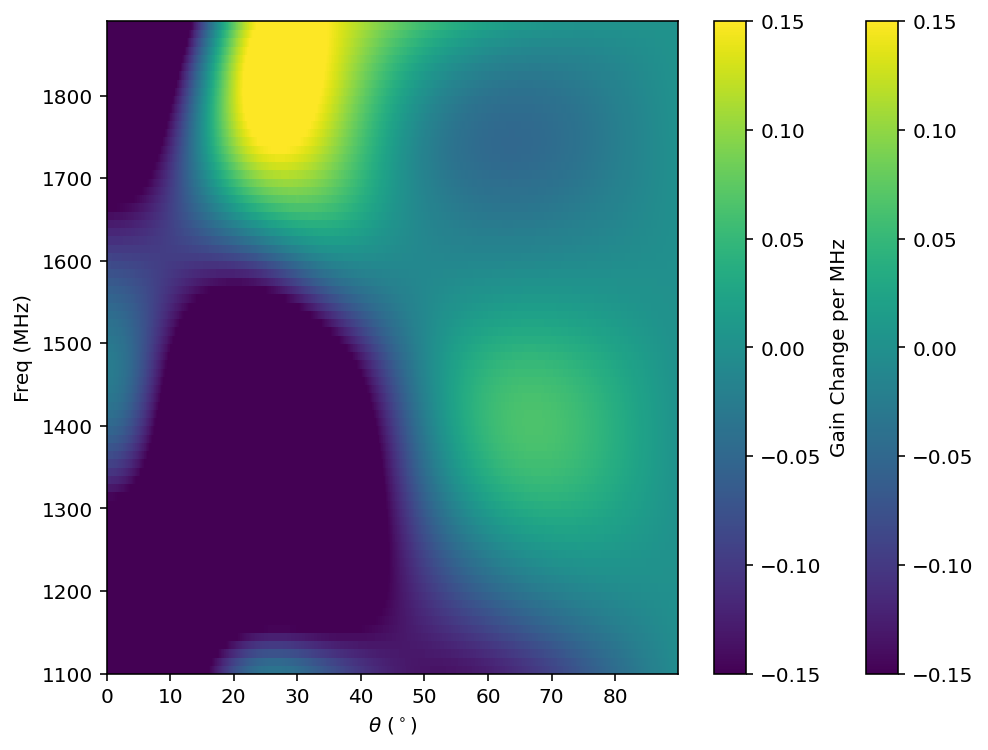

In [78]:
fig, ax = plt.subplots()

plt.figure(figsize=(8,6))
#plt.tick_params(axis='both', which='major', labelsize=15)
#plt.pcolor(x2,y2,derivbspl[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias

heatmap = plt.pcolor(x2,y2*100,derivbspl[0],vmin=-0.15,vmax=0.15) #deriv[0] es a lo largo del eje de frecuencias
cbar = plt.colorbar(heatmap)
cbar.ax.get_yaxis().set_ticks([])
plt.colorbar(label='Gain Change per MHz')
#plt.ylim(40,120)
#plt.xlim(0,120)
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')

plt.savefig('Derivada_BLADE_Phi0(0-90)')

In [23]:
beto=pow(2,3)
beto

8

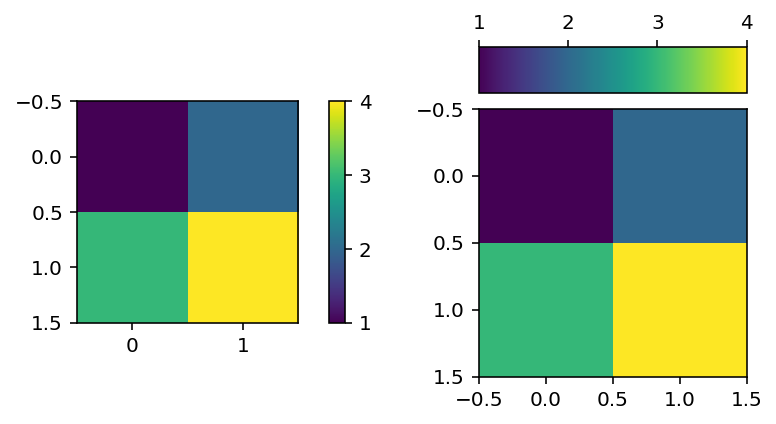

In [40]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=0.5)

im1 = ax1.imshow([[1, 2], [3, 4]])
ax1_divider = make_axes_locatable(ax1)
# add an axes to the right of the main axes.
cax1 = ax1_divider.append_axes("right", size="7%", pad="14%")
cb1 = fig.colorbar(im1, cax=cax1)

im2 = ax2.imshow([[1, 2], [3, 4]])
ax2_divider = make_axes_locatable(ax2)
# add an axes above the main axes.
cax2 = ax2_divider.append_axes("top", size="17%", pad="6%")
cb2 = fig.colorbar(im2, cax=cax2, orientation="horizontal")
# change tick position to top. Tick position defaults to bottom and overlaps
# the image.
cax2.xaxis.set_ticks_position("top")

plt.show()

In [41]:

alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}

# Show family options

families = ['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace']

t = plt.figtext(0.1, 0.9, 'family', size='large', **alignment)

yp = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

for k, family in enumerate(families):
    t = plt.figtext(0.1, yp[k], family, family=family, **alignment)

# Show style options

styles = ['normal', 'italic', 'oblique']

t = plt.figtext(0.3, 0.9, 'style', **alignment)

for k, style in enumerate(styles):
    t = plt.figtext(0.3, yp[k], style, family='sans-serif', style=style,
                    **alignment)

# Show variant options

variants = ['normal', 'small-caps']

t = plt.figtext(0.5, 0.9, 'variant', **alignment)

for k, variant in enumerate(variants):
    t = plt.figtext(0.5, yp[k], variant, family='serif', variant=variant,
                    **alignment)

# Show weight options

weights = ['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']

t = plt.figtext(0.7, 0.9, 'weight', **alignment)

for k, weight in enumerate(weights):
    t = plt.figtext(0.7, yp[k], weight, weight=weight, **alignment)

# Show size options

sizes = ['xx-small', 'x-small', 'small', 'medium', 'large',
         'x-large', 'xx-large']

t = plt.figtext(0.9, 0.9, 'size', **alignment)

for k, size in enumerate(sizes):
    t = plt.figtext(0.9, yp[k], size, size=size, **alignment)

# Show bold italic
t = plt.figtext(0.3, 0.1, 'bold italic', style='italic',
                weight='bold', size='x-small',
                **alignment)
t = plt.figtext(0.3, 0.2, 'bold italic',
                style='italic', weight='bold', size='medium',
                **alignment)
t = plt.figtext(0.3, 0.3, 'bold italic',
                style='italic', weight='bold', size='x-large',
                **alignment)

plt.show()

<Figure size 432x288 with 0 Axes>

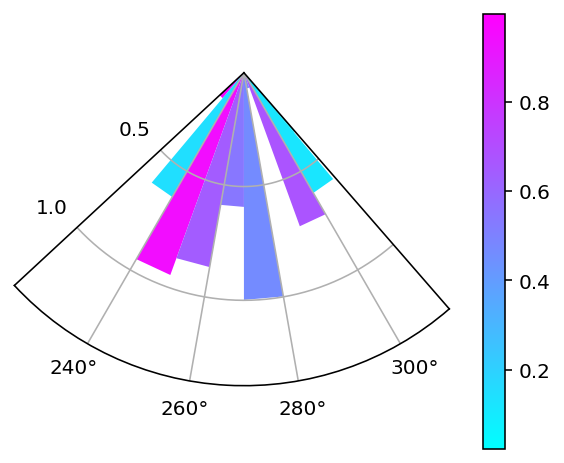

In [56]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np

def main():
       fig = plt.figure()
       ax = fig.add_subplot(111, projection='polar')
       x = np.radians(np.arange(0, 360, 10))
       y = np.random.random(x.size)
       z = np.random.random(y.size)
       cmap = plt.get_cmap('cool')
       coll = colored_bar(x, y, z, ax=ax, width=np.radians(10), cmap=cmap)
       fig.colorbar(coll)
       ax.set_yticks([0.5, 1.0])
       plt.show()   

def colored_bar(left, height, z=None, width=0.8, bottom=0, ax=None, **kwargs):
       if ax is None:
           ax = plt.gca()
       width = itertools.cycle(np.atleast_1d(width))
       bottom = itertools.cycle(np.atleast_1d(bottom))
       rects = []
       for x, y, h, w in zip(left, bottom, height, width):
           rects.append(Rectangle((x,y), w, h))
       coll = PatchCollection(rects, array=z, **kwargs)
       ax.add_collection(coll)
       ax.autoscale()
       return coll

if __name__ == '__main__':
       main()

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

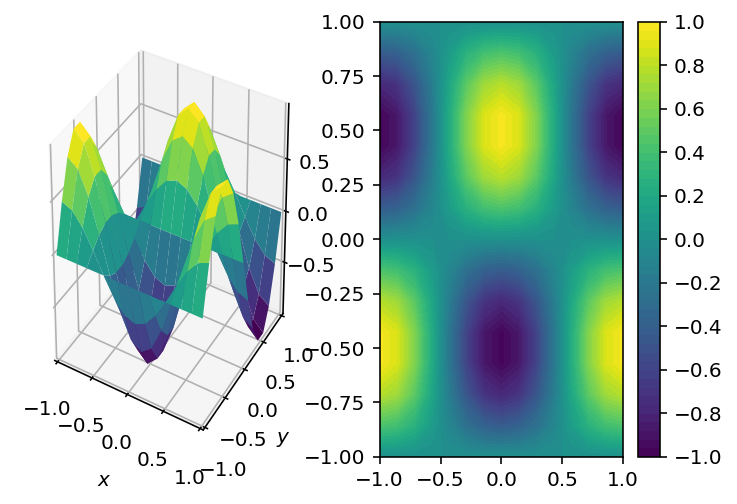

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

# generate example data
import numpy as np
x,y = np.meshgrid(np.linspace(-1,1,15),np.linspace(-1,1,15))
z = np.cos(x*np.pi)*np.sin(y*np.pi)

# actual plotting example
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis')
ax2 = fig.add_subplot(122)
cf = ax2.contourf(x,y,z,51,vmin=-1,vmax=1,cmap='viridis')
cbar = fig.colorbar(cf)
cbar.locator = LinearLocator(numticks=11)
cbar.update_ticks()
for ax in {ax1, ax2}:
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_aspect('equal')

ax1.set_zlim([-1,1])
ax1.set_zlabel(r'$\cos(\pi x) \sin(\p    i y)$')

plt.show()

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors


In [83]:
x = np.linspace(-2,2,500)
y = np.linspace(-2,2,500)
XX, YY = np.meshgrid(x, y)
Z = np.sin(XX) * np.cos(YY)

cmap = colors.ListedColormap(['red', '#000000','#444444', '#666666', '#ffffff', 'blue', 'orange'])
boundaries = [-1, -0.9, -0.6, -0.3, 0, 0.3, 0.6, 1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.pcolormesh(x,y,Z, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()

NameError: name 'colors' is not defined

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#discrete color scheme
cMap = ListedColormap(['white', 'green', 'blue','red'])

#data
np.random.seed(42)
data = np.random(4, 4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=cMap)

#legend
cbar = plt.colorbar(heatmap)
cbar.ax.set_yticklabels(['0','1','2','>3'])
cbar.set_label('# of contacts', rotation=270)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

#labels
column_labels = list('ABCD')
row_labels = list('WXYZ')
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)

plt.show()

TypeError: 'module' object is not callable